In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
#LDA -LDA is a supervised dimensionality reduction method, meaning it uses the target labels (y)
def pcared(x_train,y_train,x_test,n):
    feature_names = [f'Feature{i+1}' for i in range(x_train.shape[1])]
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    lda = LDA(n_components = n)
    ldafit=lda.fit_transform(x_train,y_train)
    ldafea=lda.transform(x_test)
    principalDf = pd.DataFrame(data = ldafit, columns = ['principal component 1', 'principal component 2'])
    print(principalDf)
    explained_variance = lda.explained_variance_ratio_
    print(explained_variance)
    plt.figure(figsize=(8,6))
    plt.scatter(ldafit[:, 0], ldafit[:, 1], c=ldafit[:, 0], cmap='viridis',alpha=0.7)
    plt.title('PCA of Data')
    plt.xlabel('First LDA Component')
    plt.ylabel('Second LDA Component')
    plt.grid(True)
    plt.show()
    return ldafit,ldafea

In [3]:
def standardscaler(indepX,depY):
    #Train and Test set split
    x_train,x_test,y_train,y_test=train_test_split(indepX,depY,test_size=0.30,random_state=0)
    sc=StandardScaler()
    x_train=sc.fit_transform(x_train)
    x_test=sc.transform(x_test)
    return x_train,x_test,y_train,y_test

In [4]:
def cmreport(classifier,x_test):
    y_pred=classifier.predict(x_test)
    cm=confusion_matrix(y_test,y_pred)
    accuracy=accuracy_score(y_test,y_pred)
    clr=classification_report(y_test,y_pred)
    return classifier,cm,accuracy,clr,x_test,y_test

In [5]:
#Logistic Regression
def logistic(x_train,y_train,x_test):
    lrclassifier=LogisticRegression(random_state=0)
    lrclassifier.fit(x_train,y_train)
    classifier,cm,accuracy,clr,x_test,y_test=cmreport(lrclassifier,x_test)
    return classifier,cm,accuracy,clr,x_test,y_test

In [6]:
def svmlinear(x_train,y_train,x_test):
    from sklearn.svm import SVC
    svli=SVC(kernel='linear',random_state=0)   
    svli.fit(x_train,y_train)
    classifier,cm,accuracy,clr,x_test,y_test=cmreport(svli,x_test)
    return classifier,cm,accuracy,clr,x_test,y_test

In [7]:
def Random(x_train,y_train,x_test):
    from sklearn.ensemble import RandomForestClassifier
    RFC=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    RFC.fit(x_train,y_train)
    classifier,cm,accuracy,clr,x_test,y_test=cmreport(RFC,x_test)
    return classifier,cm,accuracy,clr,x_test,y_test

In [8]:
def pcaconfusion(acclog,accsvmli,accran):
    df=pd.DataFrame(index=['PCA'],columns=['Logistic','SVMLinear','Random'])
    for number,idex in enumerate(df.index):
        df.loc[idex, 'Logistic'] = acclog[number]
        df.loc[idex, 'SVMLinear'] = accsvmli[number]
        df.loc[idex, 'Random'] = accran[number]
        return df

In [9]:
dataset=pd.read_csv("wine.csv",index_col=None)

In [10]:
#Input and Output Split
indepX=dataset.drop('Customer_Segment',axis=1)
depY=dataset['Customer_Segment']

In [11]:
 x_train,x_test,y_train,y_test=standardscaler(indepX,depY)

     principal component 1  principal component 2
0                 5.402298               0.702970
1                -0.480463              -3.829772
2                -4.802378               3.204870
3                -3.388790               1.076560
4                 0.736496              -2.042936
..                     ...                    ...
119              -1.803327              -3.601797
120               0.823581              -2.577498
121               0.038042              -3.619769
122               3.925960               0.754425
123              -4.577303               3.096922

[124 rows x 2 columns]
[0.73846314 0.26153686]


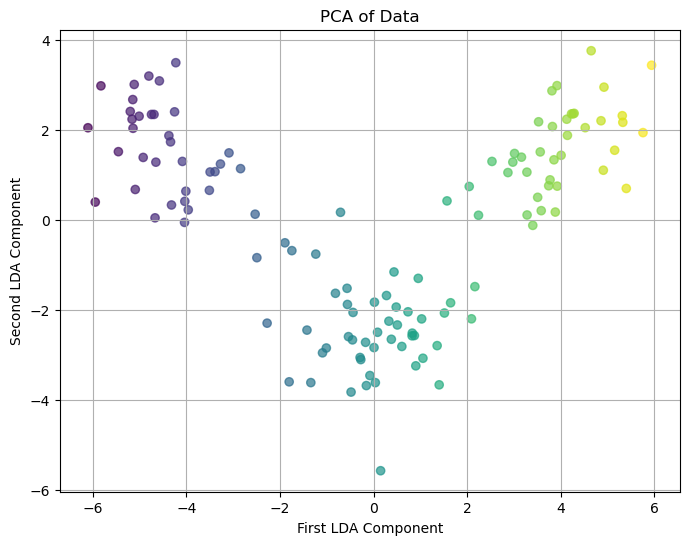

In [12]:
x_train,x_test=pcared(x_train,y_train,x_test,2)    

In [13]:
acclog=[]
accsvmli=[]
accran=[]

In [14]:
classifier,cm,accuracy,clr,x_test,y_test=logistic(x_train,y_train,x_test)
acclog.append(accuracy)
classifier,cm,accuracy,clr,x_test,y_test=svmlinear(x_train,y_train,x_test)
accsvmli.append(accuracy)
classifier,cm,accuracy,clr,x_test,y_test=Random(x_train,y_train,x_test)
accran.append(accuracy)

In [15]:
result=pcaconfusion(acclog,accsvmli,accran)
print(result)

    Logistic SVMLinear    Random
PCA      1.0       1.0  0.981481
